# Des

In all of the attacks below, we assume that the adversary has a number
of pairs $(x, y)$ where $y = DES_k(x)$, and $k$ is the secret key. (We will not
need the fact that the adversary can adaptively choose the values $x$ for which
it will receive $y = DES_k(x)$). Since DES is a Feistel network, the internal
f-function works on half a block at a time. We denote the left half of the
input by $x_1$ and the right half by $x_2$. Likewise, we denote the left half of the
output by $y_1$ and the right half of the output by $y_2$.

## one round

$\begin{cases}
x \to x_1||x_2\; ,  \; y\to y_1 || y _2 \\
y_1=x_2 \\
y_2=x_1\oplus f_1(x_2) \\
f_1(x)=P(S(E(x)\oplus k))
\end{cases}
$

we know $x$ and $y$, we want to know $k$.

In [1]:
E = [
    31,
    0,
    1,
    2,
    3,
    4,
    3,
    4,
    5,
    6,
    7,
    8,
    7,
    8,
    9,
    10,
    11,
    12,
    11,
    12,
    13,
    14,
    15,
    16,
    15,
    16,
    17,
    18,
    19,
    20,
    19,
    20,
    21,
    22,
    23,
    24,
    23,
    24,
    25,
    26,
    27,
    28,
    27,
    28,
    29,
    30,
    31,
    0,
]


def expand(block, E=E):
    """Expand 32-bit block to 48 bits using the E table"""
    return "".join(block[i] for i in E)


def xor(block, key):
    """XOR the block with the key"""
    return "".join(str(int(block[i]) ^ int(key[i])) for i in range(len(block)))

In [2]:
S1 = [
    [14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
    [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
    [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
    [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],
]

S2 = [
    [15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
    [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
    [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
    [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],
]

S3 = [
    [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
    [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
    [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
    [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],
]

S4 = [
    [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
    [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
    [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
    [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],
]

S5 = [
    [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
    [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
    [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
    [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],
]

S6 = [
    [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
    [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
    [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
    [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],
]

S7 = [
    [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
    [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
    [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
    [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],
]

S8 = [
    [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
    [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
    [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
    [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
]

S = [S1, S2, S3, S4, S5, S6, S7, S8]


def substitute(block, S=S):
    """Substitute 48-bit block using 8 S-boxes"""
    sub_blocks = [block[i * 6 : i * 6 + 6] for i in range(8)]
    res = []
    for i in range(8):
        block = sub_blocks[i]
        row = int(block[0] + block[5], 2)
        col = int(block[1:5], 2)
        val = S[i][row][col]
        bin_val = bin(val)[2:].zfill(4)
        res.append(bin_val)
    return "".join(res)

In [3]:
P = [
    16,
    7,
    20,
    21,
    29,
    12,
    28,
    17,
    1,
    15,
    23,
    26,
    5,
    18,
    31,
    10,
    2,
    8,
    24,
    14,
    32,
    27,
    3,
    9,
    19,
    13,
    30,
    6,
    22,
    11,
    4,
    25,
]

inv_P = [9,
 17,
 23,
 31,
 13,
 28,
 2,
 18,
 24,
 16,
 30,
 6,
 26,
 20,
 10,
 1,
 8,
 14,
 25,
 3,
 4,
 29,
 11,
 19,
 32,
 12,
 22,
 7,
 5,
 27,
 15,
 21]

def permute(block, P=P):
    """Permute the block using the P table"""
    return "".join(block[i - 1] for i in P)

p = bin(0x01234567)[2:].zfill(32)
pp = permute(permute(p, P), inv_P)

p == pp

True

In [4]:
def des_round(left_half, right_half, round_key):
    # Step 1: Expansion
    # The right half (32 bits) is expanded to 48 bits using the expansion function
    expanded_right = expand(right_half)

    # Step 2: Key mixing
    # The result is XORed with a round key
    xor_result = xor(expanded_right, round_key)

    # Step 3: Substitution
    # The 48-bit block is divided into 8 6-bit blocks and processed with the substitute function
    substituted_result = substitute(xor_result)

    # Step 4: Permutation
    # The 32-bit output from the substitute function is permuted
    permuted_result = permute(substituted_result)

    # Step 5: Swapping
    # The result is XORed with the left half and swapped with the right half
    new_right = xor(left_half, permuted_result)
    new_left = right_half

    return new_left, new_right

$\begin{cases}
x \to x1||x2\; ,  \; y\to y1 || y2 \\
y1=x2 \\
y2=x_1\oplus f(x2) \\
f(x2)=P(S(E(x2)\oplus k))
\end{cases}
$

we will attack S8
 
$$
\begin{equation}
P^{-1}(y2 \oplus x1) = S(E(x2)\oplus k)
\end{equation}
$$

If the guessed value of `k8` satisfies equation (1), increment the counter by 1. This allows us to calculate the probability that `k8` is the correct key. We can then observe the distribution of these probabilities for `k8`.

In [5]:
x1 = bin(0x00000000)[2:].zfill(32)
x2 = bin(0x80000000)[2:].zfill(32)
key = bin(0x400000000001)[2:].zfill(48)
y1, y2 = des_round(x1, x2, key)

guess_key = bin(0b000001)[2:].zfill(6)

def count_equation(x1, x2, y2, guess_key):
    p = xor(y2, x1)
    inv_p = permute(p, inv_P)[28:32]
    s_in = xor(expand(x2)[42:48], guess_key)
    s_out = bin(S8[int(s_in[0] + s_in[-1], 2)][int(s_in[1:-1], 2)])[2:].zfill(4)
    return s_out == inv_p

count_equation(x1, x2, y2, guess_key)

True

In [21]:
import random

x1_x2_pairs = [
    (
        bin(random.getrandbits(32))[2:].zfill(32),
        bin(random.getrandbits(32))[2:].zfill(32),
    )
    for _ in range(50)
]

key = bin(0x400000000005)[2:].zfill(48)
y1_y2_pairs = [(des_round(x1, x2, key)) for x1, x2 in x1_x2_pairs]

In [22]:
guess_key = bin(0b000011)[2:].zfill(6)

count = 0

for (x1, x2), (y1, y2) in zip(x1_x2_pairs, y1_y2_pairs):
    if count_equation(x1, x2, y2, guess_key):
        count += 1

In [23]:
# Assuming `guess_keys` is a list of all possible keys
guess_keys = [bin(i)[2:].zfill(6) for i in range(2**6)]

counts = {key: 0 for key in guess_keys}

In [24]:
for guess_key in guess_keys:
    for (x1, x2), (y1, y2) in zip(x1_x2_pairs, y1_y2_pairs):
        if count_equation(x1, x2, y2, guess_key):
            counts[guess_key] += 1

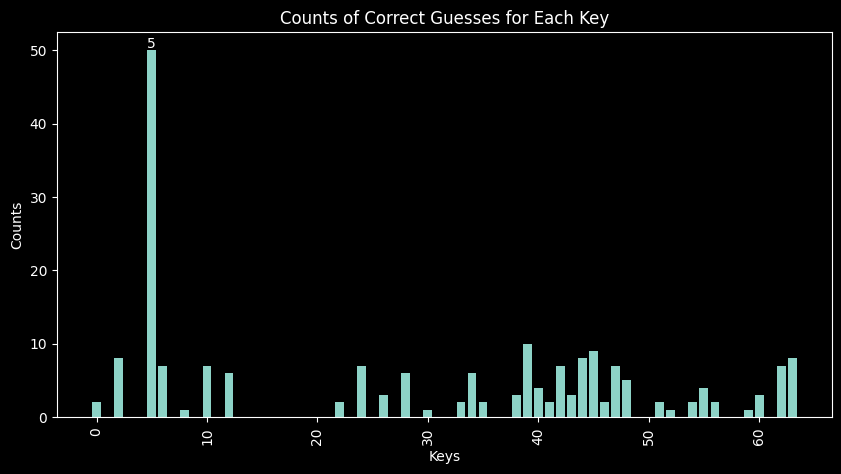

In [25]:
import matplotlib.pyplot as plt

# Assuming `counts` is your dictionary
keys = [int(k, 2) for k in counts.keys()]
values = list(counts.values())

plt.figure(figsize=(10, 5))
plt.bar(keys, values)
plt.xlabel('Keys')
plt.ylabel('Counts')
plt.title('Counts of Correct Guesses for Each Key')

# Find the key and value for the maximum count
max_key = keys[values.index(max(values))]
max_value = max(values)

# Add a label for the maximum value
plt.text(max_key, max_value, f'{max_key}', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()